<a href="https://colab.research.google.com/github/llniroshana/Research-RPM/blob/main/DataPrcoess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import io
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score  
from sklearn.metrics import classification_report 

from google.colab import files
uploaded = files.upload()

data = pd.read_csv(io.BytesIO(uploaded['cdk_data.csv']))


Saving cdk_data.csv to cdk_data.csv


In [5]:
data.head(5)

,Timestamp,What is your gender?,What is your age group?,How long you suffer from kidney disease?,Select your blood pressure level,Do you have frequent nausea?,Do you have frequent vomit?,Do you have a loss of appetite?,Is there a persistent itching in your skin?,Do you have frequent hiccups?,Is there metallic taste in your mouth?,Have you feel fatigue and weakness?,Do you have difficulties of sleeping?,Are there any changes in how much you urinate?,Have you feel decreased mental sharpness?,Do you have frequent muscle cramps / muscle twitches?,Are there Swelling of feet and ankles?,Is there any difficulty in controlling high blood pressure (hypertension)?,Final Status
0,2021/06/26 11:44:15 AM GMT+5:30,Male,65 - 74 years,1 - 3 years,120 - 139 mm Hg,Yes,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,Yes,No,Critical Patient
1,2021/06/26 12:45:14 PM GMT+5:30,Female,55 - 64 years,Below 1 year,120 - 139 mm Hg,No,No,No,No,No,No,No,No,No,No,No,No,No,Not a Critical Patient
2,2021/06/26 2:10:58 PM GMT+5:30,Male,75 - 84 years,4 - 6 years,140 - 159 mm Hg,No,Yes,No,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,Yes,Critical Patient
3,2021/06/26 2:12:47 PM GMT+5:30,Female,55 - 64 years,1 - 3 years,140 - 159 mm Hg,No,Yes,No,Yes,No,No,Yes,Yes,Yes,No,Yes,No,No,Not a Critical Patient
4,2021/06/26 2:14:10 PM GMT+5:30,Female,85 - 94 years,1 - 3 years,120 - 139 mm Hg,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,No,No,Critical Patient


In [6]:
data=data.drop(columns='Timestamp')

In [7]:
names=['gender',
'age',
'kidney_t',
'pressure_le',
'nausea_s',
'vomit_s',
'appetite_s',
'itching_s',
'hiccups_s',
'taste_s',
'fatigue_s',
'sleep_s',
'urinate_s',
'mental_s',
'muscle_s',
'swelling_s',
'hypertension_s',
'classification_s']

In [8]:
data_top=list(data)

In [9]:
data_top

['What is your gender?',
 'What is your age group?',
 'How long you suffer from kidney disease?',
 'Select your blood pressure level',
 'Do you have frequent nausea?',
 'Do you have frequent vomit?',
 'Do you have a loss of appetite?',
 'Is there a persistent itching in your skin?',
 'Do you have frequent hiccups?',
 'Is there metallic taste in your mouth?',
 'Have you feel fatigue and weakness?',
 'Do you have difficulties of sleeping?',
 'Are there any changes in how much you urinate?',
 'Have you feel decreased mental sharpness?',
 'Do you have frequent muscle cramps / muscle twitches?',
 'Are there Swelling of feet and ankles?',
 'Is there any difficulty in controlling high blood pressure (hypertension)?',
 'Final Status']

In [12]:
df = data.rename(columns={data_top[0]:names[0],
                          data_top[1]:names[1],
                          data_top[2]:names[2],
                          data_top[3]:names[3],
                          data_top[4]:names[4],
                          data_top[5]:names[5],
                          data_top[6]:names[6],
                          data_top[7]:names[7],
                          data_top[8]:names[8],
                          data_top[9]:names[9],
                          data_top[10]:names[10],
                          data_top[11]:names[11],
                          data_top[12]:names[12],
                          data_top[13]:names[13],
                          data_top[14]:names[14],
                          data_top[15]:names[15],
                          data_top[16]:names[16],
                          data_top[17]:names[17]      
                         })


In [13]:
df.head(10)

,gender,age,kidney_t,pressure_le,nausea_s,vomit_s,appetite_s,itching_s,hiccups_s,taste_s,fatigue_s,sleep_s,urinate_s,mental_s,muscle_s,swelling_s,hypertension_s,classification_s
0,Male,65 - 74 years,1 - 3 years,120 - 139 mm Hg,Yes,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,Yes,No,Critical Patient
1,Female,55 - 64 years,Below 1 year,120 - 139 mm Hg,No,No,No,No,No,No,No,No,No,No,No,No,No,Not a Critical Patient
2,Male,75 - 84 years,4 - 6 years,140 - 159 mm Hg,No,Yes,No,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,Yes,Critical Patient
3,Female,55 - 64 years,1 - 3 years,140 - 159 mm Hg,No,Yes,No,Yes,No,No,Yes,Yes,Yes,No,Yes,No,No,Not a Critical Patient
4,Female,85 - 94 years,1 - 3 years,120 - 139 mm Hg,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,No,No,Critical Patient
5,Female,55 - 64 years,Below 1 year,< 120 mm Hg,No,No,No,No,No,No,Yes,No,No,No,Yes,No,No,Not a Critical Patient
6,Male,65 - 74 years,1 - 3 years,120 - 139 mm Hg,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,No,No,No,Critical Patient
7,Female,75 - 84 years,Below 1 year,120 - 139 mm Hg,Yes,Yes,Yes,Yes,No,No,No,Yes,No,Yes,No,Yes,No,Critical Patient
8,Male,75 - 84 years,Below 1 year,140 - 159 mm Hg,Yes,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Critical Patient
9,Female,55 - 64 years,1 - 3 years,120 - 139 mm Hg,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,No,Critical Patient


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            128 non-null    object
 1   age               128 non-null    object
 2   kidney_t          128 non-null    object
 3   pressure_le       128 non-null    object
 4   nausea_s          128 non-null    object
 5   vomit_s           128 non-null    object
 6   appetite_s        128 non-null    object
 7   itching_s         128 non-null    object
 8   hiccups_s         128 non-null    object
 9   taste_s           128 non-null    object
 10  fatigue_s         128 non-null    object
 11  sleep_s           128 non-null    object
 12  urinate_s         128 non-null    object
 13  mental_s          128 non-null    object
 14  muscle_s          128 non-null    object
 15  swelling_s        128 non-null    object
 16  hypertension_s    128 non-null    object
 17  classification_s

In [15]:
print("Shape :",df.shape)

Shape : (128, 18)


In [16]:
print(df.describe())

        gender            age  ... hypertension_s  classification_s
count      128            128  ...            128               128
unique       2              5  ...              2                 2
top     Female  65 - 74 years  ...             No  Critical Patient
freq        69             43  ...             72                87

[4 rows x 18 columns]


In [17]:
#we will deal with categorical data after cleaning the data
df.astype('category').describe()

,gender,age,kidney_t,pressure_le,nausea_s,vomit_s,appetite_s,itching_s,hiccups_s,taste_s,fatigue_s,sleep_s,urinate_s,mental_s,muscle_s,swelling_s,hypertension_s,classification_s
count,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128
unique,2,5,4,4,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,Female,65 - 74 years,1 - 3 years,120 - 139 mm Hg,Yes,No,No,No,No,No,Yes,No,Yes,No,Yes,No,No,Critical Patient
freq,69,43,62,86,90,84,66,74,72,75,65,66,68,68,65,70,72,87


In [18]:
df.isnull().sum()

gender              0
age                 0
kidney_t            0
pressure_le         0
nausea_s            0
vomit_s             0
appetite_s          0
itching_s           0
hiccups_s           0
taste_s             0
fatigue_s           0
sleep_s             0
urinate_s           0
mental_s            0
muscle_s            0
swelling_s          0
hypertension_s      0
classification_s    0
dtype: int64

In [19]:
df['age'].unique()

array(['65 - 74 years', '55 - 64 years', '75 - 84 years', '85 - 94 years',
       'Above 95 years'], dtype=object)

In [20]:
# df["age"].replace({"65 - 74 years": "1" }, inplace=True)
# df["age"].replace({"55 - 64 years": "2" }, inplace=True)
# df["age"].replace({"75 - 84 years": "3" }, inplace=True)
# df["age"].replace({"85 - 94 years": "4" }, inplace=True)
# df["age"].replace({"Above 95 years": "5" }, inplace=True)

In [21]:
# df["pressure_le"].replace({"< 120 mm Hg": "0" }, inplace=True)
# df["pressure_le"].replace({"120 - 139 mm Hg": "1" }, inplace=True)
# df["pressure_le"].replace({"140 - 159 mm Hg": "2" }, inplace=True)
# df["pressure_le"].replace({"160 - 179 mm Hg": "3" }, inplace=True)

In [22]:
# df["kidney_t"].replace({"Below 1 year": "0" }, inplace=True)
# df["kidney_t"].replace({"1 - 3 years": "1" }, inplace=True)
# df["kidney_t"].replace({"4 - 6 years": "2" }, inplace=True)
# df["kidney_t"].replace({"Above 7 years": "3" }, inplace=True)

In [23]:
df['age'].unique()

array(['65 - 74 years', '55 - 64 years', '75 - 84 years', '85 - 94 years',
       'Above 95 years'], dtype=object)

In [24]:
df['classification_s'].unique()

array(['Critical Patient', 'Not a Critical Patient'], dtype=object)

## Data Visualization

In [25]:
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

In [26]:
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

Text(0.5, 1.0, 'CDK status')

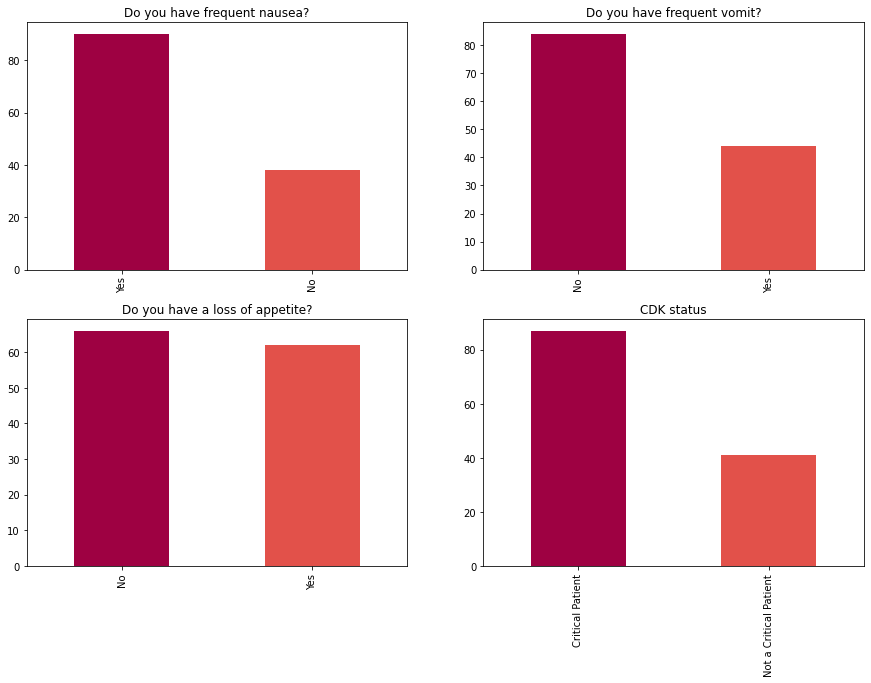

In [27]:
fig, ax = plt.subplots(2,2, figsize=(15,10))

df['nausea_s'].value_counts().plot(kind='bar',color = colors, ax=ax[0,0])
df['vomit_s'].value_counts().plot(kind='bar',color = colors, ax=ax[0,1])
df['appetite_s'].value_counts().plot(kind='bar',color = colors, ax=ax[1,0])
df['classification_s'].value_counts().plot(kind='bar',color = colors, ax=ax[1,1])

ax[0, 0].set_title("Do you have frequent nausea?")
ax[0, 1].set_title("Do you have frequent vomit?")
ax[1, 0].set_title("Do you have a loss of appetite?")
ax[1, 1].set_title("CDK status")



In [28]:
names

['gender',
 'age',
 'kidney_t',
 'pressure_le',
 'nausea_s',
 'vomit_s',
 'appetite_s',
 'itching_s',
 'hiccups_s',
 'taste_s',
 'fatigue_s',
 'sleep_s',
 'urinate_s',
 'mental_s',
 'muscle_s',
 'swelling_s',
 'hypertension_s',
 'classification_s']

### Data Preprocessing 

In [39]:
le = preprocessing.LabelEncoder()

le.fit(df["gender"])
df["gender"]=le.transform(df["gender"])

le.fit(df["age"])
df["age"]=le.transform(df["age"])

le.fit(df["kidney_t"])
df["kidney_t"]=le.transform(df["kidney_t"])

le.fit(df["pressure_le"])
df["pressure_le"]=le.transform(df["pressure_le"])

le.fit(df["nausea_s"])
df["nausea_s"]=le.transform(df["nausea_s"])

le.fit(df["vomit_s"])
df["vomit_s"]=le.transform(df["vomit_s"])

le.fit(df["appetite_s"])
df["appetite_s"]=le.transform(df["appetite_s"])

le.fit(df["itching_s"])
df["itching_s"]=le.transform(df["itching_s"])

le.fit(df["hiccups_s"])
df["hiccups_s"]=le.transform(df["hiccups_s"])

le.fit(df["gender"])
df["gender"]=le.transform(df["gender"])

le.fit(df["taste_s"])
df["taste_s"]=le.transform(df["taste_s"])

le.fit(df["fatigue_s"])
df["fatigue_s"]=le.transform(df["fatigue_s"])

le.fit(df["sleep_s"])
df["sleep_s"]=le.transform(df["sleep_s"])

le.fit(df["urinate_s"])
df["urinate_s"]=le.transform(df["urinate_s"])

le.fit(df["mental_s"])
df["mental_s"]=le.transform(df["mental_s"])

le.fit(df["muscle_s"])
df["muscle_s"]=le.transform(df["muscle_s"])

le.fit(df["swelling_s"])
df["swelling_s"]=le.transform(df["swelling_s"])

le.fit(df["hypertension_s"])
df["hypertension_s"]=le.transform(df["hypertension_s"])

In [40]:
df

,gender,age,kidney_t,pressure_le,nausea_s,vomit_s,appetite_s,itching_s,hiccups_s,taste_s,fatigue_s,sleep_s,urinate_s,mental_s,muscle_s,swelling_s,hypertension_s,classification_s
0,1,1,0,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1
1,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2,1,1,0,1,0,1,1,0,0,1,1,1,1,0,1,1
3,0,0,0,1,0,1,0,1,0,0,1,1,1,0,1,0,0,0
4,0,3,0,0,1,0,1,1,0,1,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,1,3,0,1,1,1,0,1,1,1,1,1,0,1,0,1,1,1
124,0,0,0,0,1,0,1,0,0,1,0,1,1,0,1,0,1,1
125,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1
126,1,3,2,0,1,0,1,0,1,0,1,0,1,0,0,1,1,1


In [41]:
df["classification_s"].replace({"Critical Patient":"1"}, inplace=True)
df["classification_s"].replace({"Not a Critical Patient": "0" }, inplace=True)

In [42]:
df

,gender,age,kidney_t,pressure_le,nausea_s,vomit_s,appetite_s,itching_s,hiccups_s,taste_s,fatigue_s,sleep_s,urinate_s,mental_s,muscle_s,swelling_s,hypertension_s,classification_s
0,1,1,0,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1
1,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2,1,1,0,1,0,1,1,0,0,1,1,1,1,0,1,1
3,0,0,0,1,0,1,0,1,0,0,1,1,1,0,1,0,0,0
4,0,3,0,0,1,0,1,1,0,1,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,1,3,0,1,1,1,0,1,1,1,1,1,0,1,0,1,1,1
124,0,0,0,0,1,0,1,0,0,1,0,1,1,0,1,0,1,1
125,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1
126,1,3,2,0,1,0,1,0,1,0,1,0,1,0,0,1,1,1


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            128 non-null    int64 
 1   age               128 non-null    int64 
 2   kidney_t          128 non-null    int64 
 3   pressure_le       128 non-null    int64 
 4   nausea_s          128 non-null    int64 
 5   vomit_s           128 non-null    int64 
 6   appetite_s        128 non-null    int64 
 7   itching_s         128 non-null    int64 
 8   hiccups_s         128 non-null    int64 
 9   taste_s           128 non-null    int64 
 10  fatigue_s         128 non-null    int64 
 11  sleep_s           128 non-null    int64 
 12  urinate_s         128 non-null    int64 
 13  mental_s          128 non-null    int64 
 14  muscle_s          128 non-null    int64 
 15  swelling_s        128 non-null    int64 
 16  hypertension_s    128 non-null    int64 
 17  classification_s

In [44]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['classification_s'])
y = df['classification_s']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42)

In [45]:
 from sklearn import neighbors #impport libraries

from sklearn import metrics

k = 3 #define K

knn = neighbors.KNeighborsClassifier(k)  #make model
knn.fit(X_train,y_train) #train mode
y_pred=knn.predict(X_test) #test model


In [46]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 

accuracy = accuracy_score(y_test, y_pred) 

In [47]:
accuracy

0.8653846153846154

### Data Modeling

In [48]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score  
from sklearn.metrics import classification_report 

In [49]:
def calc_metrics(model_object, X_test, y_test,test_start_timer, test_stop_timer,training_start_timer, training_stop_timer):
  
  y_pred = model_object.predict(X_test)
  
  report_test_accuracy = accuracy_score(y_test, y_pred)
  report_conf_matrix = confusion_matrix(y_test, y_pred)
#   report_precision_rate = precision_score(y_test, y_pred)
#   report_recall_rate = recall_score(y_test, y_pred,pos_label='bin)
#   report_f1 = f1_score(y_test, y_pred,pos_label='binary')   
  
  performance_metrics = {'test_accuracy': report_test_accuracy,\
                         'confusion_matrix': report_conf_matrix,\
#                          'precision': report_precision_rate,\
#                          'recall': report_recall_rate,\
#                          'f1': report_f1,\
                         'testing_time':test_stop_timer - test_start_timer,\
                         'training_time': training_stop_timer - training_start_timer,\
                         'total_time':test_stop_timer-training_start_timer                       
                        }
  return performance_metrics

In [50]:
#initializing the models
import timeit


MLP=MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(5, 2), random_state=1)
svm_model=SVC()
bayes_model = GaussianNB()
lr = LogisticRegression()
random_forest_model = RandomForestClassifier(n_estimators=100, max_depth=20,random_state=7) 

#model array 
models = [svm_model,random_forest_model,bayes_model,lr,random_forest_model]

#emphty array to store clasiifier score
classifier_scores=[]

#for cross validation 
kfold = model_selection.KFold(n_splits=7, random_state=100)


for i in models:
    w = timeit.default_timer() 
    i.fit(X_train, y_train) #train models in models array  (one by one)
    x = timeit.default_timer()
    predict=i.predict(X_test) # test the models in the models array (one by one)
    y=timeit.default_timer() #test_stop_timer
#     cv_score = model_selection.cross_val_score(model,train_x, train_y, cv=kfold)
    classifier_scores.append(calc_metrics(i, X_test, y_test,x,y,w,x)) #classifier scores as a data array
    


#converting classifier score array to a dataframe    

df_model_performance = pd.DataFrame(classifier_scores, \
                                    index=['MultiLinerar Perceptron', 'support Vector Machine', \
                                           'Naiive Bayes', 'Logistic regression',  \
                                           'RF'\
                                          ]\
                                   )


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [51]:
df_model_performance

,test_accuracy,confusion_matrix,testing_time,training_time,total_time
MultiLinerar Perceptron,0.903846,"[[9, 5], [0, 38]]",0.000881,0.001914,0.002795
support Vector Machine,0.903846,"[[10, 4], [1, 37]]",0.009110,0.140679,0.149790
Naiive Bayes,0.923077,"[[10, 4], [0, 38]]",0.000739,0.001248,0.001987
Logistic regression,0.923077,"[[10, 4], [0, 38]]",0.000776,0.010970,0.011746
RF,0.903846,"[[10, 4], [1, 37]]",0.009072,0.134466,0.143538
